<a href="https://colab.research.google.com/github/dpasierbiewicz/Cardiotocography_Fetus_Classification/blob/main/CTG_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Import and beggining of cleaning


In [1]:
import pandas as pd

url = 'https://github.com/dpasierbiewicz/Cardiotocography_Fetus_Classification/raw/225121f344eaf9619a05f0ccdd146e4435a4afcc/CTG.xls'

df = pd.read_excel(url, sheet_name='Data')

#column setup
df.columns = df.iloc[0]
df = df[1:]

print(df.head())


0    b     e AC FM UC DL DS DP DR NaN  ...   E  AD  DE  LD  FS SUSP NaN CLASS  \
1  240   357  0  0  0  0  0  0  0 NaN  ...  -1  -1  -1  -1   1   -1 NaN     9   
2    5   632  4  0  4  2  0  0  0 NaN  ...  -1   1  -1  -1  -1   -1 NaN     6   
3  177   779  2  0  5  2  0  0  0 NaN  ...  -1   1  -1  -1  -1   -1 NaN     6   
4  411  1192  2  0  6  2  0  0  0 NaN  ...  -1   1  -1  -1  -1   -1 NaN     6   
5  533  1147  4  0  5  0  0  0  0 NaN  ...  -1  -1  -1  -1  -1   -1 NaN     2   

0 NaN NSP  
1 NaN   2  
2 NaN   1  
3 NaN   1  
4 NaN   1  
5 NaN   1  

[5 rows x 46 columns]


In [2]:
print(df.columns)
len(df.columns)


Index([       'b',        'e',       'AC',       'FM',       'UC',       'DL',
             'DS',       'DP',       'DR',        nan,       'LB',       'AC',
             'FM',       'UC',       'DL',       'DS',       'DP',     'ASTV',
           'MSTV',     'ALTV',     'MLTV',    'Width',      'Min',      'Max',
           'Nmax',   'Nzeros',     'Mode',     'Mean',   'Median', 'Variance',
       'Tendency',        nan,        'A',        'B',        'C',        'D',
              'E',       'AD',       'DE',       'LD',       'FS',     'SUSP',
              nan,    'CLASS',        nan,      'NSP'],
      dtype='object', name=0)


46

In [3]:
#deleting #NaN columns
df = df.dropna(how='all', axis=1)

In [4]:
len(df.columns)

42

In [5]:
#deleting columns with duplicate name
df = df.loc[:, ~df.columns.duplicated(keep='last')]

print(df.columns)
len(df.columns)

Index(['b', 'e', 'DR', 'LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV',
       'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object', name=0)


36

In [6]:
df["DR"].max()
#Because in this feature there is always zero this feature will be deleted along with columns that are not needed for this classification

0

In [7]:
df = df.drop(['b', 'e', 'DR', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS'], axis=1)

In [8]:
print(df.columns)
len(df.columns)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'NSP'],
      dtype='object', name=0)


22

In [9]:
nan_exists = df.isnull().values.any()
nan_exists

np.True_

In [10]:
print(df.tail)

<bound method NDFrame.tail of 0      LB        AC        FM        UC        DL        DS        DP ASTV  \
1     120         0         0         0         0         0         0   73   
2     132   0.00638         0   0.00638   0.00319         0         0   17   
3     133  0.003322         0  0.008306  0.003322         0         0   16   
4     134  0.002561         0  0.007682  0.002561         0         0   16   
5     132  0.006515         0  0.008143         0         0         0   16   
...   ...       ...       ...       ...       ...       ...       ...  ...   
2125  140  0.000679         0   0.00611         0         0         0   78   
2126  142  0.001616  0.001616  0.008078         0         0         0   74   
2127  NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN   
2128  NaN       NaN       NaN       NaN         0         0         0  NaN   
2129  NaN       NaN  0.480634  0.014925  0.015385  0.001353  0.005348   87   

0    MSTV ALTV  ...  Min  Max Nma

### Last three rows of this dataset contains min and max values of some attributes so they were removed


In [11]:
df = df.iloc[:-3]
print(df.tail)

<bound method NDFrame.tail of 0      LB        AC        FM        UC        DL DS DP ASTV MSTV ALTV  ...  \
1     120         0         0         0         0  0  0   73  0.5   43  ...   
2     132   0.00638         0   0.00638   0.00319  0  0   17  2.1    0  ...   
3     133  0.003322         0  0.008306  0.003322  0  0   16  2.1    0  ...   
4     134  0.002561         0  0.007682  0.002561  0  0   16  2.4    0  ...   
5     132  0.006515         0  0.008143         0  0  0   16  2.4    0  ...   
...   ...       ...       ...       ...       ... .. ..  ...  ...  ...  ...   
2122  140         0         0  0.007426         0  0  0   79  0.2   25  ...   
2123  140  0.000775         0  0.006971         0  0  0   78  0.4   22  ...   
2124  140   0.00098         0  0.006863         0  0  0   79  0.4   20  ...   
2125  140  0.000679         0   0.00611         0  0  0   78  0.4   27  ...   
2126  142  0.001616  0.001616  0.008078         0  0  0   74  0.4   36  ...   

0     Min  Max Nmax N

##Histograms

### Now I want to know what values attributes have dependent on which class of fetus  they are, so I will make histograms for each attribute and then decide which attributes I will use to train the model

###There are three possible classification of a fetus:
###NSP = 1 - Normal, NSP = 2 - Suspect, NSP = 3 - Pathologic   



In [12]:
df["NSP"].value_counts()

,count
NSP,
1,1655
2,295
3,176


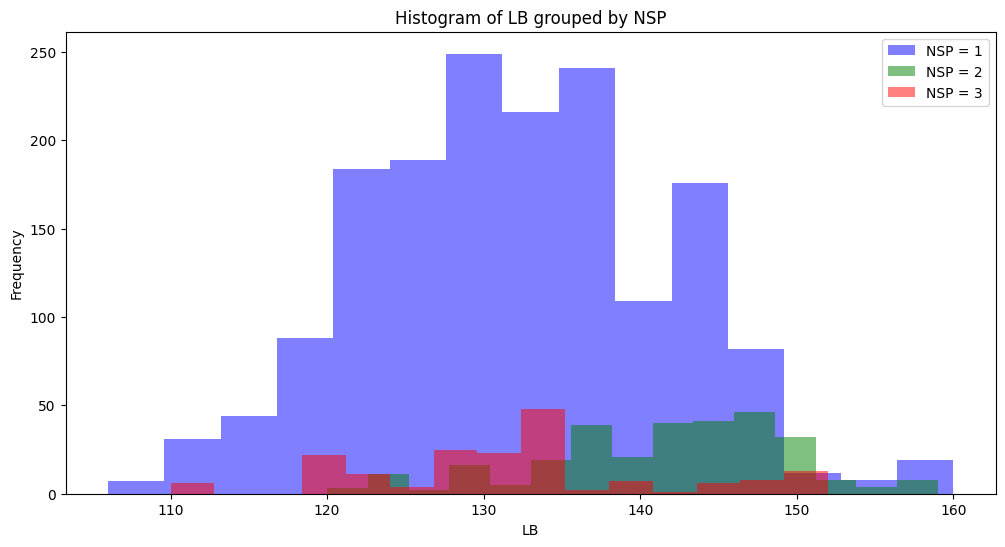

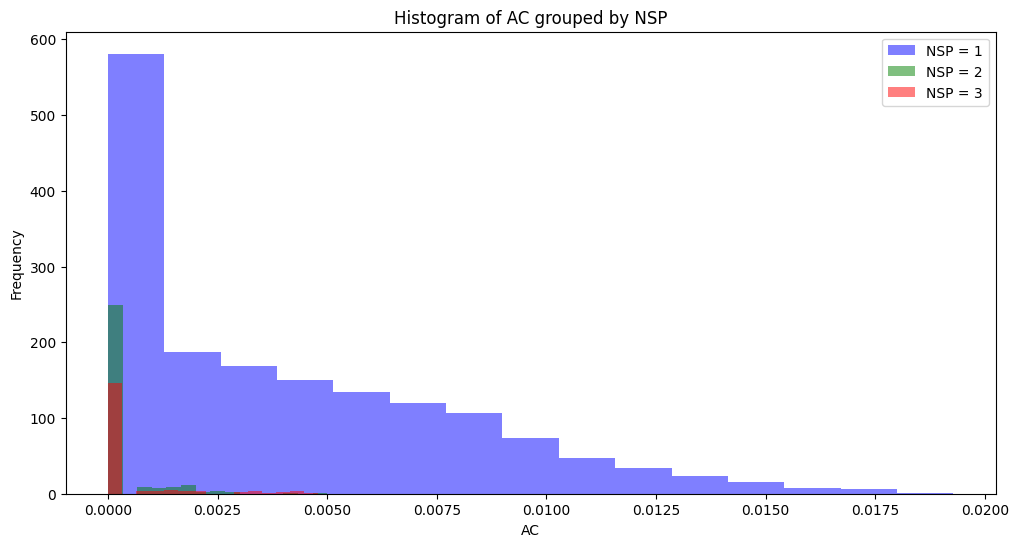

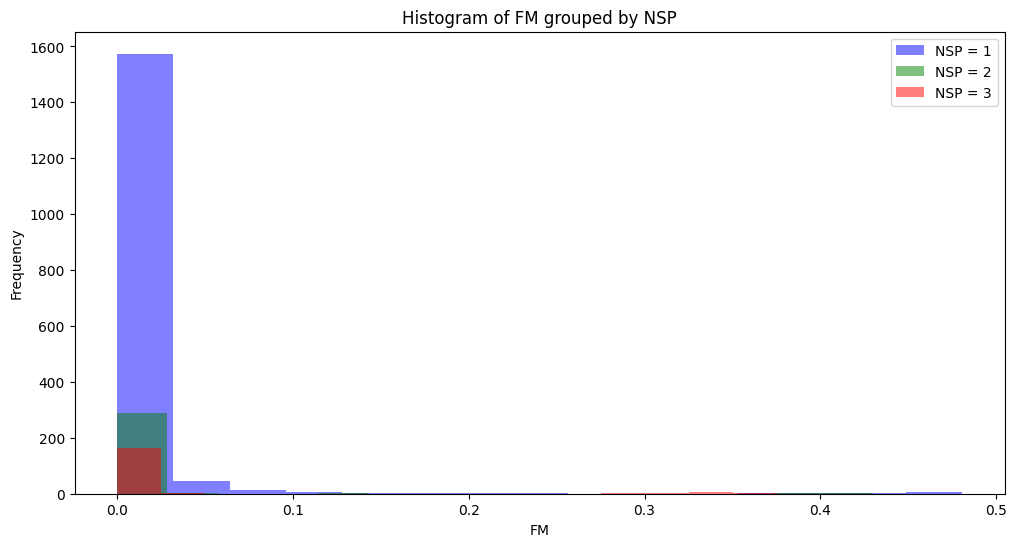

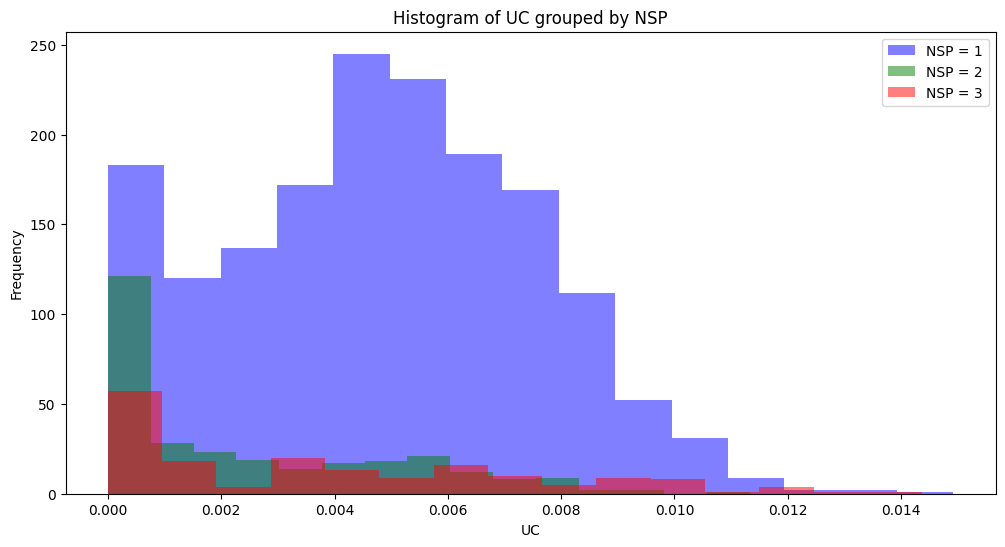

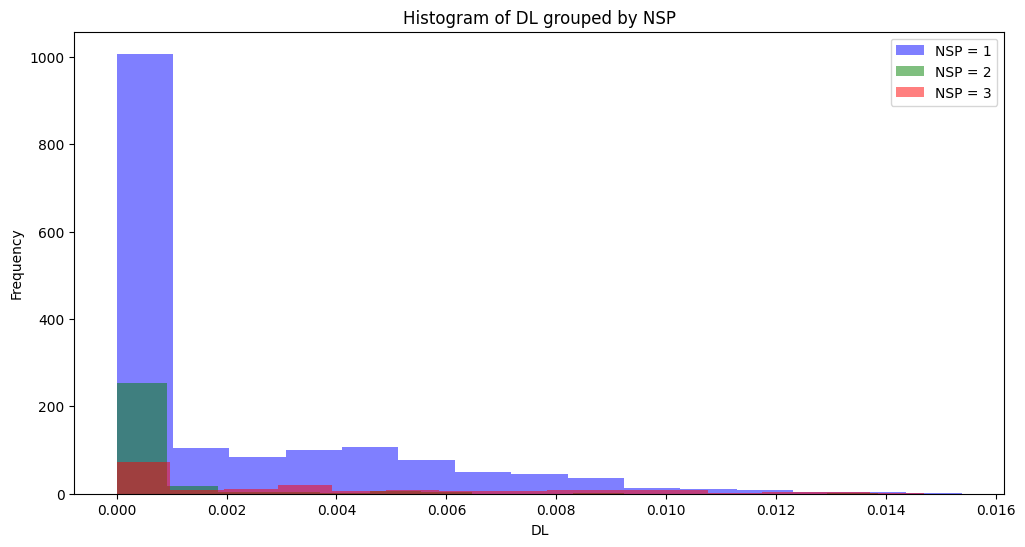

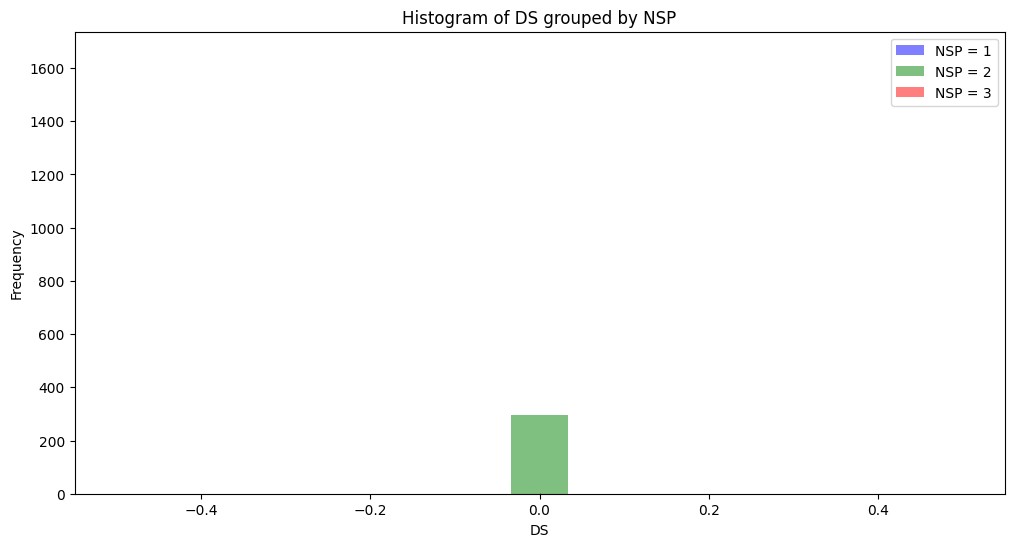

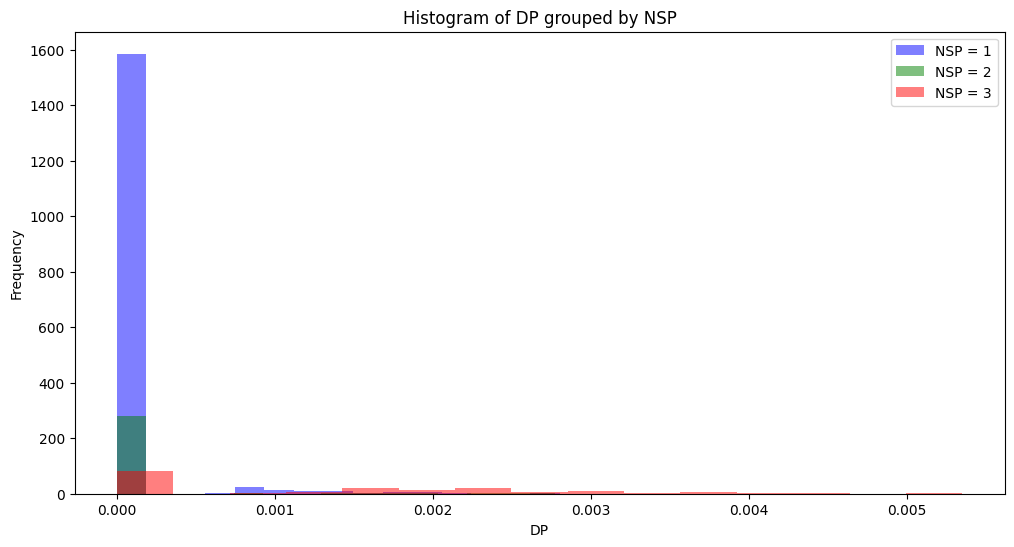

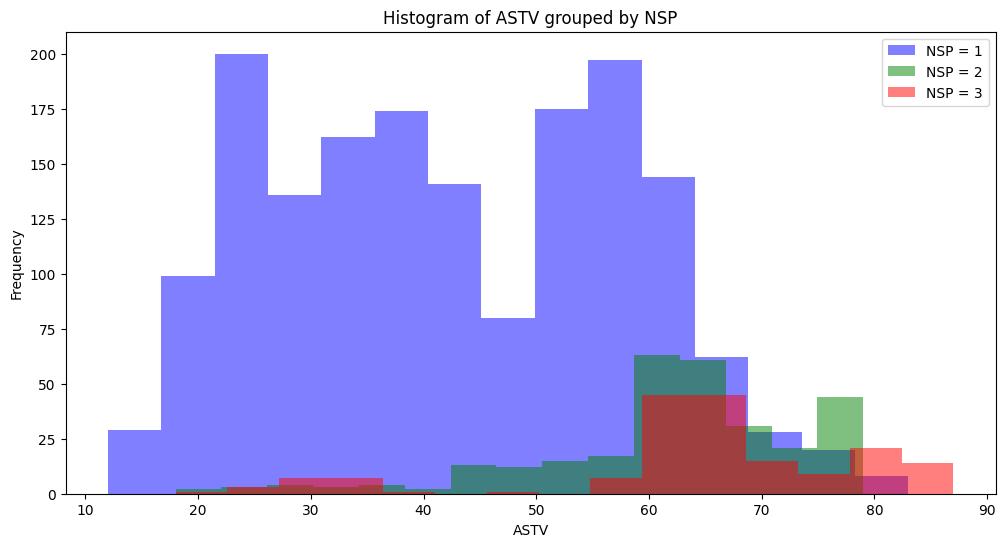

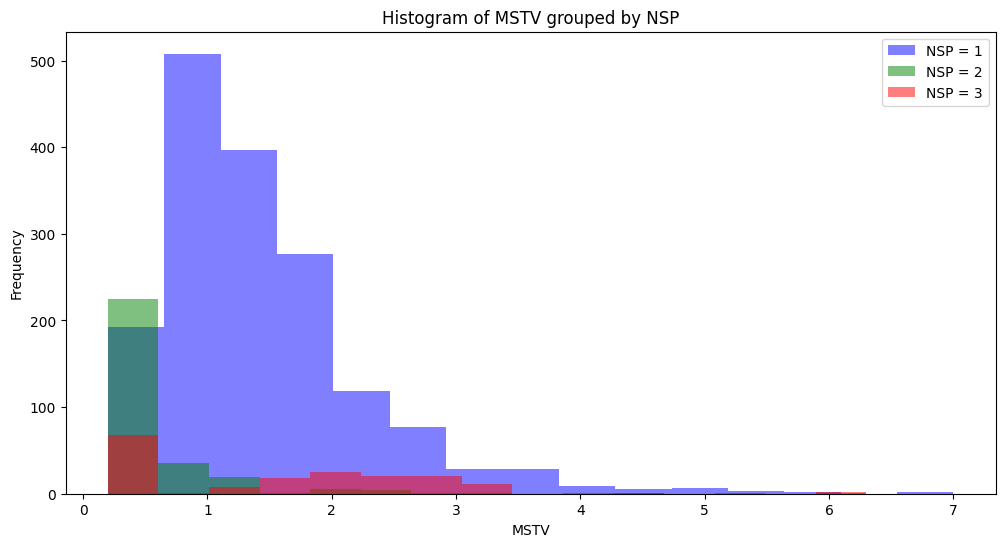

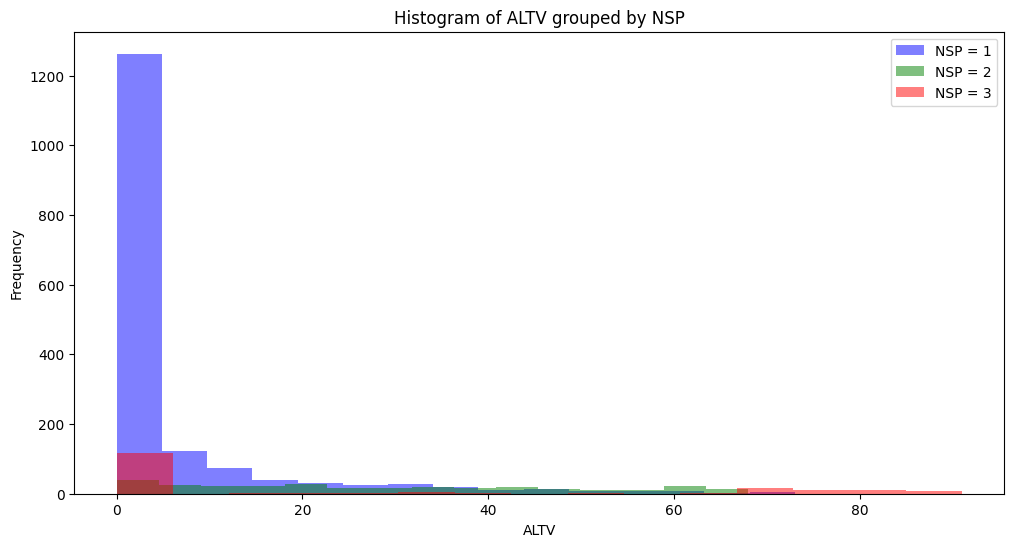

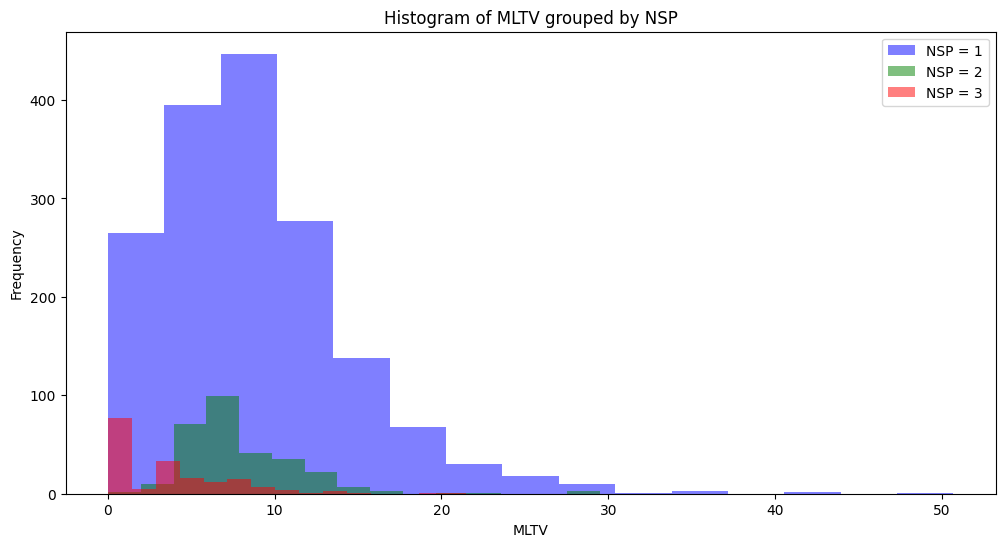

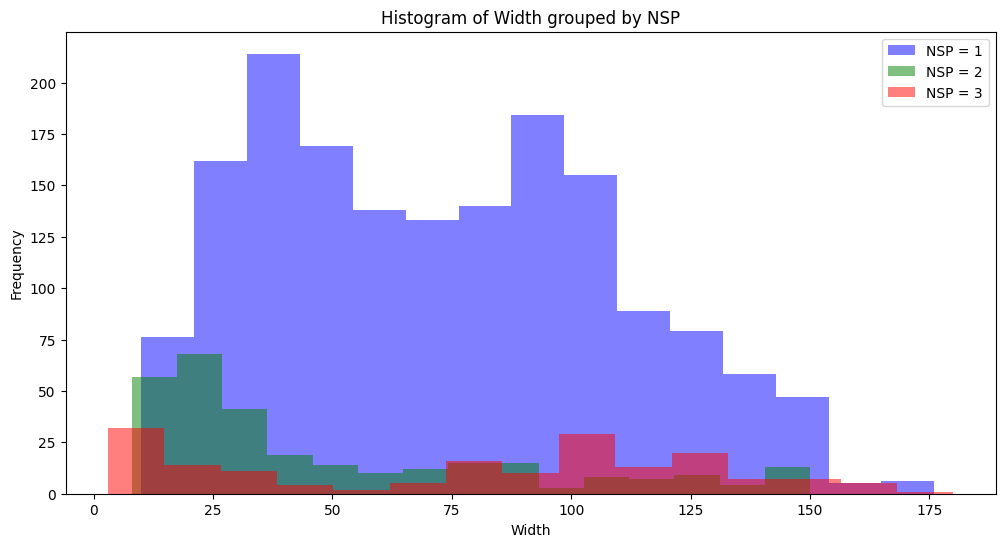

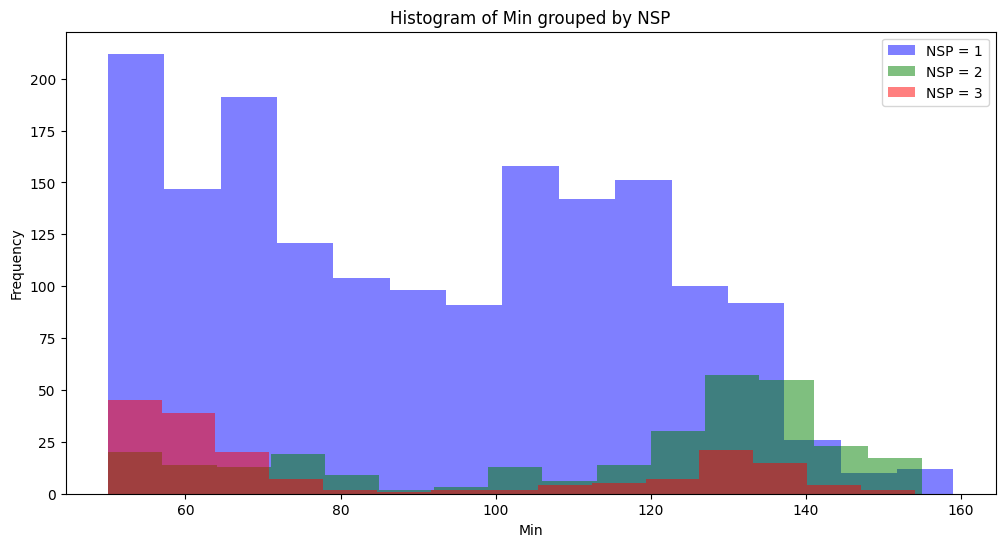

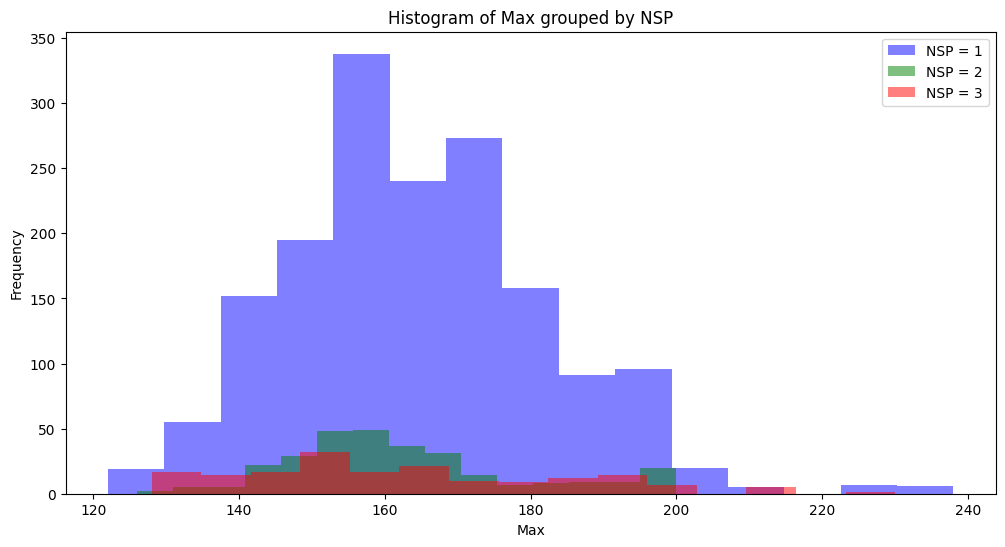

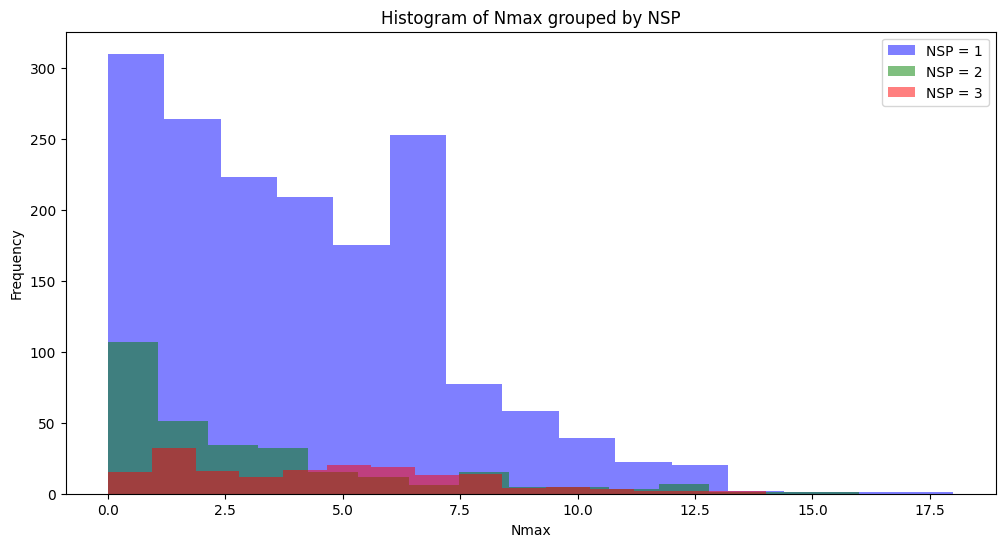

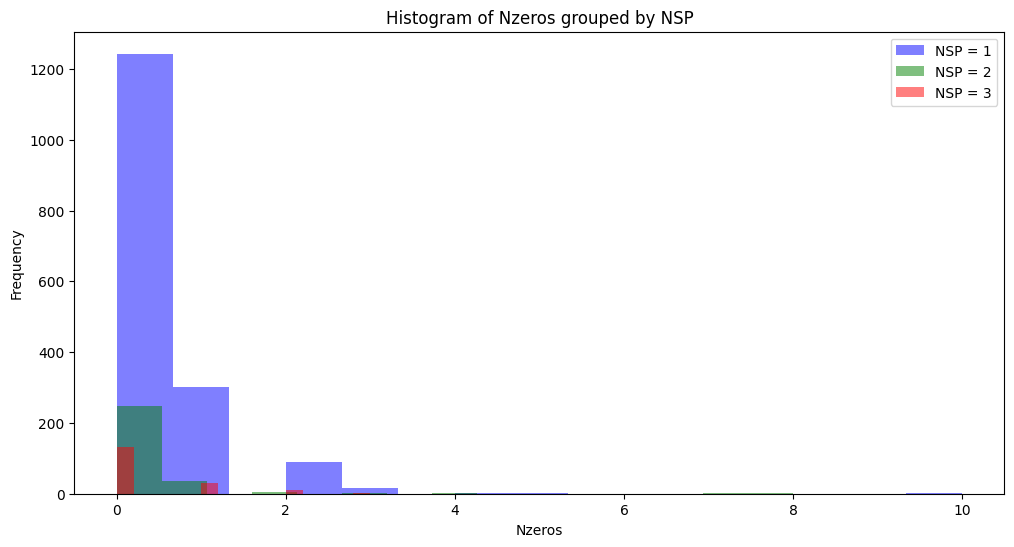

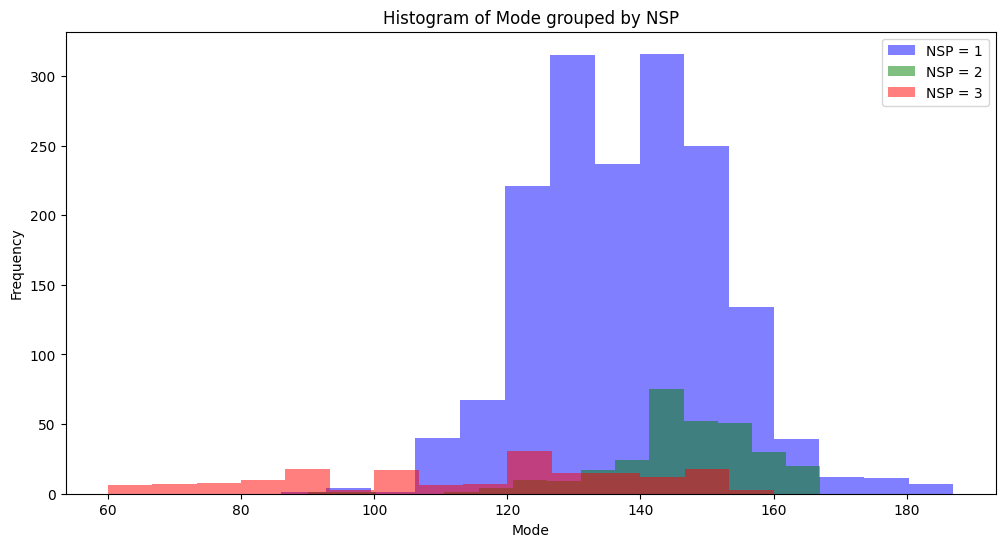

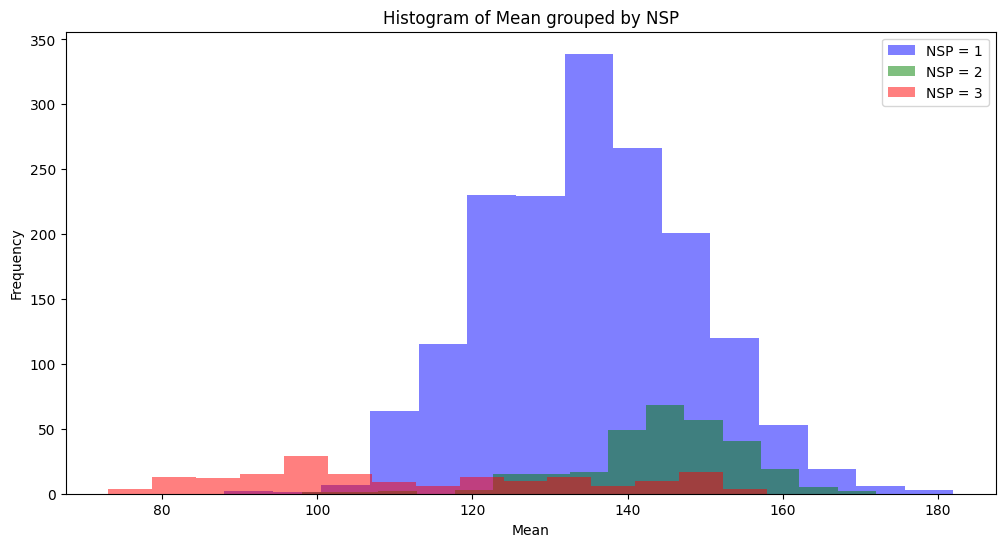

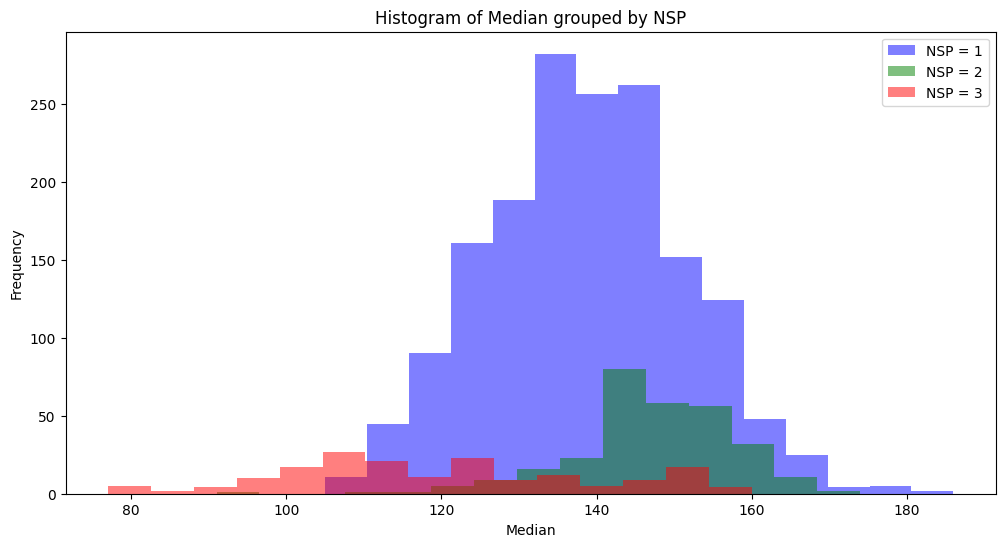

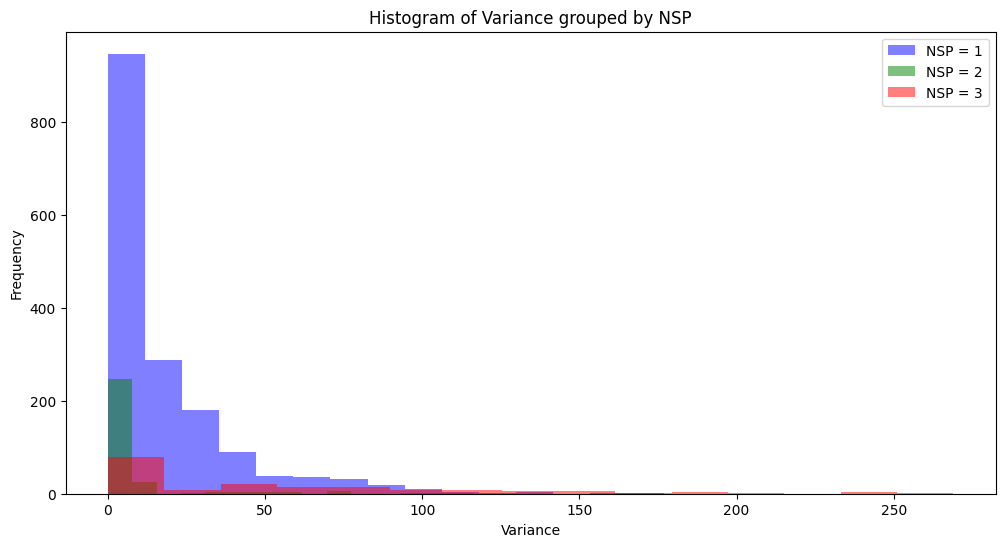

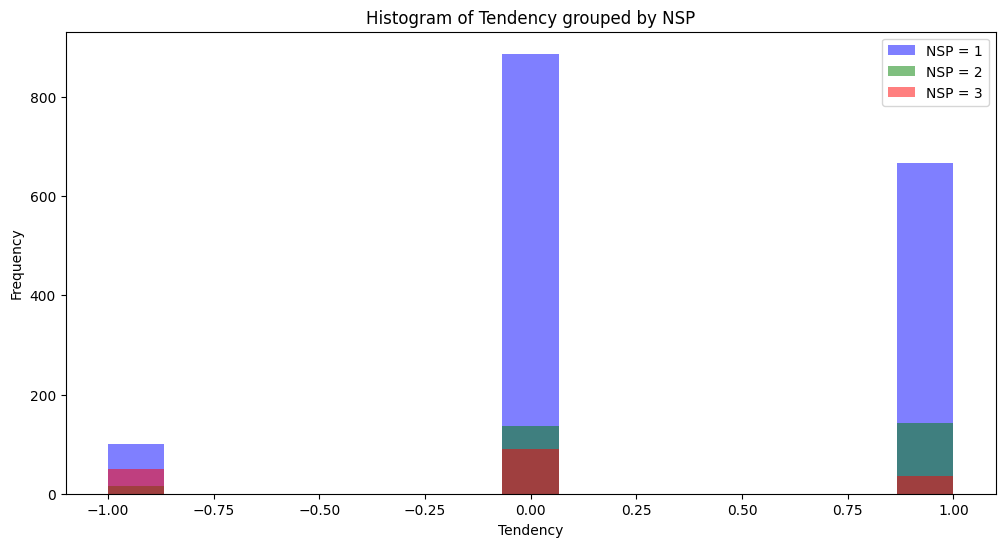

In [13]:

import matplotlib.pyplot as plt


for column in df.columns:
    if column != "NSP":
        nsp_1 = df[df["NSP"] == 1][column]
        nsp_2 = df[df["NSP"] == 2][column]
        nsp_3 = df[df["NSP"] == 3][column]

        plt.figure(figsize=(12, 6))
        plt.hist(nsp_1, bins=15, alpha=0.5, label='NSP = 1', color='blue')
        plt.hist(nsp_2, bins=15, alpha=0.5, label='NSP = 2', color='green')
        plt.hist(nsp_3, bins=15, alpha=0.5, label='NSP = 3', color='red')

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column} grouped by NSP')
        plt.legend()

        plt.show()





In [14]:
df.describe()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126,2126,2126,2126,2126,2126,2126,2126,2126.0,2126,...,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126
unique,48,1015,696,1315,751,8,166,75,57.0,87,...,109,86,18,9,88,103,95,133,3,3
top,133,0,0,0,0,0,0,60,0.8,0,...,50,157,1,0,133,143,146,1,0,1
freq,136,891,1311,332,1231,2119,1948,62,125.0,1240,...,77,71,357,1624,140,65,69,248,1115,1655


In [15]:
print(df['DS'].describe())

count     2126
unique       8
top          0
freq      2119
Name: DS, dtype: int64


In [16]:
import numpy as np

bins = np.histogram(df['DS'], bins=10)[1]
print(bins)


[0.0 0.00013531799729364006 0.00027063599458728013 0.0004059539918809202
 0.0005412719891745603 0.0006765899864682003 0.0008119079837618404
 0.0009472259810554804 0.0010825439783491205 0.0012178619756427606
 0.0013531799729364006]


In [17]:
print(df[df['NSP'] == 1]['DS'].value_counts())
print(df[df['NSP'] == 2]['DS'].value_counts())
print(df[df['NSP'] == 3]['DS'].value_counts())


DS
0          1654
0.00089       1
Name: count, dtype: int64
DS
0    295
Name: count, dtype: int64
DS
0           170
0.001079      1
0.000948      1
0.001029      1
0.001178      1
0.001144      1
0.001353      1
Name: count, dtype: int64


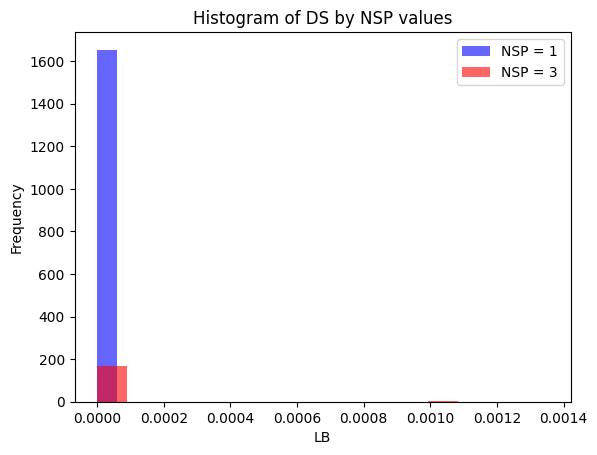

In [18]:
nsp_1 = df[df['NSP'] == 1]['DS']
nsp_3 = df[df['NSP'] == 3]['DS']

plt.hist(nsp_1, bins=15, alpha=0.6, label='NSP = 1', color='blue')
plt.hist(nsp_3, bins=15, alpha=0.6, label='NSP = 3', color='red')

plt.xlabel('LB')
plt.ylabel('Frequency')
plt.title('Histogram of DS by NSP values')
plt.legend()

plt.show()


In [19]:
df = df.drop('DS', axis=1)

In [20]:
print(df.columns)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'NSP'],
      dtype='object', name=0)


###Looking at the histograms and other function it was consodered that columns DS will be removed, because it does not give almost any information, there is a room to remove other attributes looking at their histograms, but for now every other attribute will be used and normalised aside from tendency, where one-hot encoding will be used. In first iterations of this project there won't be a standarization.

In [21]:
df = pd.get_dummies(df, columns=['Tendency'], prefix='Tendency')

In [22]:
print(df)

       LB        AC        FM        UC        DL DP ASTV MSTV ALTV  MLTV  \
1     120         0         0         0         0  0   73  0.5   43   2.4   
2     132   0.00638         0   0.00638   0.00319  0   17  2.1    0  10.4   
3     133  0.003322         0  0.008306  0.003322  0   16  2.1    0  13.4   
4     134  0.002561         0  0.007682  0.002561  0   16  2.4    0    23   
5     132  0.006515         0  0.008143         0  0   16  2.4    0  19.9   
...   ...       ...       ...       ...       ... ..  ...  ...  ...   ...   
2122  140         0         0  0.007426         0  0   79  0.2   25   7.2   
2123  140  0.000775         0  0.006971         0  0   78  0.4   22   7.1   
2124  140   0.00098         0  0.006863         0  0   79  0.4   20   6.1   
2125  140  0.000679         0   0.00611         0  0   78  0.4   27     7   
2126  142  0.001616  0.001616  0.008078         0  0   74  0.4   36     5   

      ... Nmax Nzeros Mode Mean Median Variance NSP Tendency_-1 Tendency_0 

In [23]:
df['Tendency_-1'] = df['Tendency_-1'].astype(int)
df['Tendency_0'] = df['Tendency_0'].astype(int)
df['Tendency_1'] = df['Tendency_1'].astype(int)

In [24]:
print(df)

       LB        AC        FM        UC        DL DP ASTV MSTV ALTV  MLTV  \
1     120         0         0         0         0  0   73  0.5   43   2.4   
2     132   0.00638         0   0.00638   0.00319  0   17  2.1    0  10.4   
3     133  0.003322         0  0.008306  0.003322  0   16  2.1    0  13.4   
4     134  0.002561         0  0.007682  0.002561  0   16  2.4    0    23   
5     132  0.006515         0  0.008143         0  0   16  2.4    0  19.9   
...   ...       ...       ...       ...       ... ..  ...  ...  ...   ...   
2122  140         0         0  0.007426         0  0   79  0.2   25   7.2   
2123  140  0.000775         0  0.006971         0  0   78  0.4   22   7.1   
2124  140   0.00098         0  0.006863         0  0   79  0.4   20   6.1   
2125  140  0.000679         0   0.00611         0  0   78  0.4   27     7   
2126  142  0.001616  0.001616  0.008078         0  0   74  0.4   36     5   

      ... Nmax Nzeros Mode Mean Median Variance NSP Tendency_-1 Tendency_0 

In [25]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


columns_to_normalize = df.columns.difference(['NSP'])

scaler = MinMaxScaler()

df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df_normalized)


            LB        AC        FM        UC        DL   DP      ASTV  \
1     0.259259  0.000000  0.000000  0.000000  0.000000  0.0  0.813333   
2     0.481481  0.330827  0.000000  0.427432  0.207337  0.0  0.066667   
3     0.500000  0.172283  0.000000  0.556478  0.215947  0.0  0.053333   
4     0.518519  0.132797  0.000000  0.514725  0.166453  0.0  0.053333   
5     0.481481  0.337832  0.000000  0.545603  0.000000  0.0  0.053333   
...        ...       ...       ...       ...       ...  ...       ...   
2122  0.629630  0.000000  0.000000  0.497525  0.000000  0.0  0.893333   
2123  0.629630  0.040168  0.000000  0.467080  0.000000  0.0  0.880000   
2124  0.629630  0.050840  0.000000  0.459804  0.000000  0.0  0.893333   
2125  0.629630  0.035205  0.000000  0.409369  0.000000  0.0  0.880000   
2126  0.666667  0.083776  0.003361  0.541195  0.000000  0.0  0.826667   

          MSTV      ALTV      MLTV  ...      Nmax  Nzeros      Mode      Mean  \
1     0.044118  0.472527  0.047337  ...  0

## Separation of data into train and test subsets

### For this experiment train subset will have a 70% of all data, and test subset will have 30% af the dataset.

In [26]:
main_data_percentage = 0.7

X = df_normalized.drop(columns=["NSP"]).iloc[0: int(len(df) * main_data_percentage)]
Y = pd.get_dummies(df_normalized["NSP"]).iloc[0: int(len(df) * main_data_percentage)]
# testing datasets:
X_test = df_normalized.drop(columns=["NSP"]).iloc[int(len(df) * main_data_percentage):]
Y_test = pd.get_dummies(df_normalized["NSP"]).iloc[int(len(df) * main_data_percentage):]


In [27]:
Y

,1,2,3
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
...,...,...,...
1484,True,False,False
1485,True,False,False
1486,True,False,False
1487,True,False,False


In [28]:
Y = Y.astype(int)
Y_test = Y_test.astype(int)

In [29]:
print(Y)

      1  2  3
1     0  1  0
2     1  0  0
3     1  0  0
4     1  0  0
5     1  0  0
...  .. .. ..
1484  1  0  0
1485  1  0  0
1486  1  0  0
1487  1  0  0
1488  1  0  0

[1488 rows x 3 columns]


In [30]:
Y.columns = ['Normal', 'Suspect', 'Pathologic']
print(Y)
Y_test.columns = ['Normal', 'Suspect', 'Pathologic']
print(Y_test)

      Normal  Suspect  Pathologic
1          0        1           0
2          1        0           0
3          1        0           0
4          1        0           0
5          1        0           0
...      ...      ...         ...
1484       1        0           0
1485       1        0           0
1486       1        0           0
1487       1        0           0
1488       1        0           0

[1488 rows x 3 columns]
      Normal  Suspect  Pathologic
1489       1        0           0
1490       0        0           1
1491       0        1           0
1492       0        0           1
1493       0        0           1
...      ...      ...         ...
2122       0        1           0
2123       0        1           0
2124       0        1           0
2125       0        1           0
2126       1        0           0

[638 rows x 3 columns]


###Funkcje aktywacji

In [31]:
def relu(x):
    return np.maximum(0, x)
def ReLU(x):
    return x * (x > 0)

def d_relu(x):
    return np.heaviside(x, 0)


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def stable_softmax(x):
    # Sprawdzanie i obsługa wartości NaN lub nieskończonych
    if np.any(np.isnan(x)) or np.any(np.isinf(x)):
        # Obsługa błędu - resetowanie do bezpiecznych wartości
        x = np.nan_to_num(x, nan=0.0, posinf=1.0, neginf=0.0)

    # Odejmowanie maksymalnej wartości dla stabilności numerycznej
    shifted_x = x - np.max(x)
    exp_x = np.exp(shifted_x)
    return exp_x / np.sum(exp_x)



###Calculating precision and recall

In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

def count_precision_recall(y_real, y_pred, column):
    # Konwersja predykcji z one-hot na etykiety
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_real_labels = np.argmax(y_real, axis=1)

    # Oblicz macierz pomyłek dla wszystkich klas
    cm = confusion_matrix(y_real_labels, y_pred_labels)

    # Dla wybranej klasy (column)
    tp = cm[column, column]
    fp = cm[:, column].sum() - tp
    fn = cm[column, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    return [precision, recall]


###Cross-Entropy loss function

In [88]:
def multiclass_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # Because with it there cannot be log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred), axis=1).mean()
    return loss

###Testing function

In [86]:
def testing(final_output_layer_weights, final_hidden_layer_weights, x_test_data, y_test_data):
    # counting proper guessed records
    fine_results_counter = 0
    final_y_result = []

    # loop that is going through the network
    for j in range(0, x_test_data.shape[0]):
        # [3.pobudzenia neuronw warstwy ukrytej]
        hidden_layer = np.matmul(final_hidden_layer_weights.T, x_test_data.iloc[j].to_numpy())
        # [4.wyjścia neuronów warstwy ukrytej]
        hidden_layer_activated = relu(hidden_layer)
        # [5.pobudzenia neuronow warstwy wyjsciowej]
        last_layer = np.matmul(final_output_layer_weights.T, hidden_layer_activated)
        # [6.wyjscia neuronów warstwy wyjsciowej]
        after_last_layer = stable_softmax(last_layer)
        #print(f"after last layer: {after_last_layer}")
        # checking output of network translated to binary values as below
        # find the maximum value in the array
        max_value = np.max(after_last_layer)
        # set maximum value to 1, others to 0
        result_after_last_layer = np.where(after_last_layer == max_value, 1, 0)

        # comparing output of network to y_test_data and if the same, then increase fine_results_counter
        #print(f"Resultr after last layer: {result_after_last_layer}")

        predicted_class = np.argmax(result_after_last_layer)
        true_class = np.argmax(y_test_data.iloc[j].to_numpy())
        if predicted_class == true_class:
            fine_results_counter += 1
        #print(f"Predicted class: {predicted_class}")
        #print(f"true_class: {true_class}")

        # adding one row to final_y_result
        final_y_result.append(result_after_last_layer)

    # Precision_Recall Calculating
    precision_recall1 = count_precision_recall(y_test_data, final_y_result, 0)
    precision_recall2 = count_precision_recall(y_test_data, final_y_result, 1)
    precision_recall3 = count_precision_recall(y_test_data, final_y_result, 2)
    # Precision
    precision1_by_iteration.append(precision_recall1[0])
    precision2_by_iteration.append(precision_recall2[0])
    precision3_by_iteration.append(precision_recall3[0])
    # Recall
    recall1_by_iteration.append(precision_recall1[1])
    recall2_by_iteration.append(precision_recall2[1])
    recall3_by_iteration.append(precision_recall3[1])
    # PRINTING RESULTS AFTER ITERATION
    print("===============")
    print("Precision: ")
    print(precision_recall1[0])
    print(precision_recall2[0])
    print(precision_recall3[0])
    print("Recall: ")
    print(precision_recall1[1])
    print(precision_recall2[1])
    print(precision_recall3[1])
    print("PROPER GUESSES: ")
    print(fine_results_counter)
    print("TEST DATASET SIZE: ")
    print(x_test_data.shape[0])
    print("ACCURACY: ")
    print(fine_results_counter / x_test_data.shape[0])
    print("===============")


###Training function


In [84]:
def train(output_layer_weights, hidden_layer_weights):
    # loop that is iterating whole dataset
    for k in range(epochs):
        # loop that is going through the network
        for i in range(0, round(X.shape[0])):
            # input layer from dataset
            current_row = X.iloc[i]
            # [3.pobudzenia neuronow warstwy ukrytej]
            hidden_layer = np.matmul(hidden_layer_weights.T, current_row.to_numpy())
            # [4.wyjścia neuronów warstwy ukrytej]
            hidden_layer_activated = relu(hidden_layer)
            # [5.pobudzenia neuronow warstwy wyjsciowej]
            last_layer = np.matmul(output_layer_weights.T, hidden_layer_activated)

            last_layer_normalized = (last_layer - np.mean(last_layer)) / (np.std(last_layer) + 1e-8)
            # [6.wyjscia neuronów warstwy wyjsciowej]
            after_last_layer = stable_softmax(last_layer_normalized)
            # [7.] sygnal bledu dla warstwy wyjsciowej
            output_layer_error = np.subtract(after_last_layer, Y.iloc[i])
            # [8. ]sygnal bledu dla warstwy ukrytej
            hidden_layer_error = np.matmul(output_layer_weights, output_layer_error) * d_relu(hidden_layer)

            # helping variables
            # Correct gradient for output layer weights
            delta_output_layer_weights = learning_rate * np.outer(
                hidden_layer_activated,
                output_layer_error
            )

            delta_hidden_layer_weights = (
                    learning_rate
                    * np.matmul(
                hidden_layer_error.reshape((hidden_layer_neuron_amount, 1)),
                current_row.to_numpy().reshape((22, 1)).T,
            )
            ).T
            grad_norm_output = np.linalg.norm(delta_output_layer_weights)
            if grad_norm_output > max_grad_norm:
                delta_output_layer_weights *= max_grad_norm / grad_norm_output

            # Clip hidden layer gradients
            grad_norm_hidden = np.linalg.norm(delta_hidden_layer_weights)
            if grad_norm_hidden > max_grad_norm:
                delta_hidden_layer_weights *= max_grad_norm / grad_norm_hidden

            # [9. ]zmodyfikuj wagi warstwy wyjsciowej
            output_layer_weights = output_layer_weights + delta_output_layer_weights
            # [10. ]zmodyfikuj wagi warstwy ukrytej
            hidden_layer_weights = hidden_layer_weights + delta_hidden_layer_weights
            # print("Max hidden weight:", np.max(hidden_layer_weights))
            # print("Max output weight:", np.max(output_layer_weights))

        # errors for charts calculating
        error1 = multiclass_cross_entropy(Y.iloc[i].values.reshape(1, -1), after_last_layer.reshape(1, -1))
        error_by_iteration.append(error1)
        # testing network with calculated weights
        testing(output_layer_weights, hidden_layer_weights, X_test, Y_test)


### Printing charts

In [36]:
def print_charts():
    # Cross Entropy by iterations
    plt.figure(1)
    plt.plot([i + 1 for i in range(epochs)], error_by_iteration)
    plt.xlabel('iterations')
    plt.ylabel('Cross Entropy error')
    plt.title('Cross Entropy error by iterations')
    plt.show()

    # Precision
    plt.figure(2)
    # precision1
    plt.subplot(3, 1, 1)
    plt.title("Precision by iterations; 3 classes(1,2,3)")
    plt.plot([i + 1 for i in range(epochs)], precision1_by_iteration)
    plt.xlabel('iterations')
    plt.ylabel('precision_1')
    # precision2
    plt.subplot(3, 1, 2)
    plt.plot([i + 1 for i in range(epochs)], precision2_by_iteration)
    plt.xlabel('iterations')
    plt.ylabel('precision_2')
    # precision3
    plt.subplot(3, 1, 3)
    plt.plot([i + 1 for i in range(epochs)], precision3_by_iteration)
    plt.xlabel('iterations')
    plt.ylabel('precision_3')
    plt.show()

    # Recall
    plt.figure(3)
    # recall1
    plt.subplot(3, 1, 1)
    plt.title("recall by iterations; 3 classes(1,2,3)")
    plt.plot([i + 1 for i in range(epochs)], recall1_by_iteration)
    plt.xlabel('iterations')
    plt.ylabel('recall_1')
    # recall2
    plt.subplot(3, 1, 2)
    plt.plot([i + 1 for i in range(epochs)], recall2_by_iteration)
    plt.xlabel('iterations')
    plt.ylabel('recall_2')
    # recall3
    plt.subplot(3, 1, 3)
    plt.plot([i + 1 for i in range(epochs)], recall3_by_iteration)
    plt.xlabel('iterations')
    plt.ylabel('recall_3')
    plt.show()

Precision: 
0.7940552016985138
0.09090909090909091
0.25203252032520324
Recall: 
0.7465069860279441
0.05128205128205128
0.5254237288135594
PROPER GUESSES: 
409
TEST DATASET SIZE: 
638
ACCURACY: 
0.6410658307210031
Precision: 
0.7931769722814499
0.08888888888888889
0.25
Recall: 
0.7425149700598802
0.05128205128205128
0.5254237288135594
PROPER GUESSES: 
407
TEST DATASET SIZE: 
638
ACCURACY: 
0.6379310344827587
Precision: 
0.7918454935622318
0.08888888888888889
0.2440944881889764
Recall: 
0.7365269461077845
0.05128205128205128
0.5254237288135594
PROPER GUESSES: 
404
TEST DATASET SIZE: 
638
ACCURACY: 
0.6332288401253918
Precision: 
0.7931034482758621
0.09090909090909091
0.23846153846153847
Recall: 
0.7345309381237525
0.05128205128205128
0.5254237288135594
PROPER GUESSES: 
403
TEST DATASET SIZE: 
638
ACCURACY: 
0.6316614420062696
Precision: 
0.7917570498915402
0.09090909090909091
0.23308270676691728
Recall: 
0.7285429141716567
0.05128205128205128
0.5254237288135594
PROPER GUESSES: 
400
TEST 

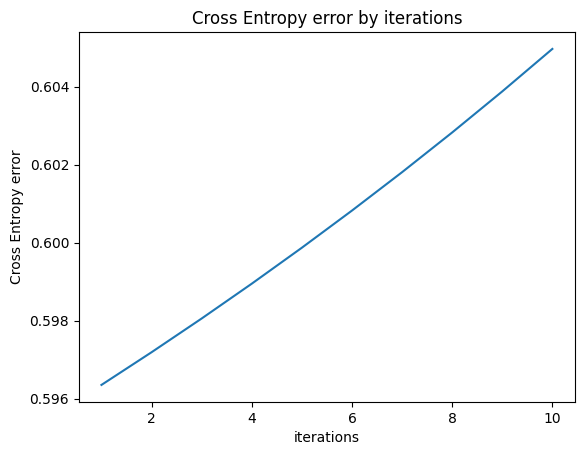

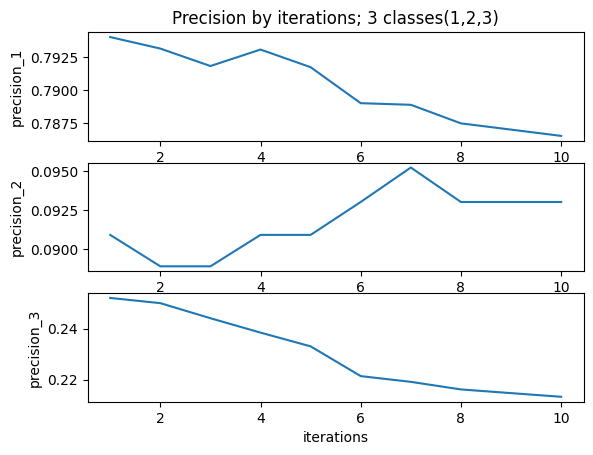

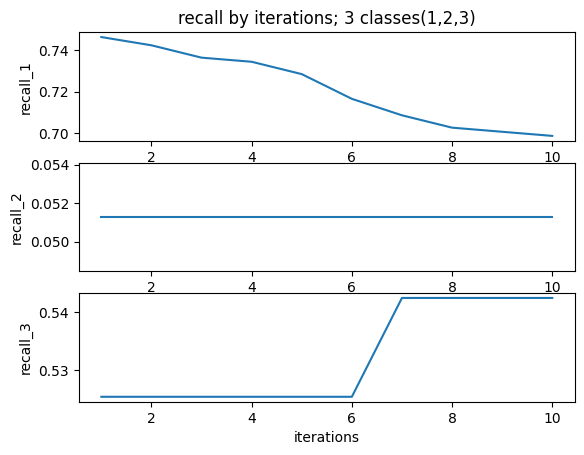

In [102]:
learning_rate = 0.00001
hidden_layer_neuron_amount = 10
epochs = 10
max_grad_norm = 0.3
hidden_layer_weights = np.random.randn(22, hidden_layer_neuron_amount) * np.sqrt(2/22)
output_layer_weights = np.random.randn(hidden_layer_neuron_amount, 3) * np.sqrt(2/hidden_layer_neuron_amount)

# CHART DATA
error_by_iteration = []
precision1_by_iteration = []
precision2_by_iteration = []
precision3_by_iteration = []
recall1_by_iteration = []
recall2_by_iteration = []
recall3_by_iteration = []
final_y_result = []

# UTILS
fine_results_counter = 0

train(output_layer_weights, hidden_layer_weights)
print_charts()

In [99]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df_normalized, random_state=42)

X = df_shuffled.drop(columns=["NSP"]).iloc[0: int(len(df_shuffled) * main_data_percentage)]
Y = pd.get_dummies(df_shuffled["NSP"]).iloc[0: int(len(df_shuffled) * main_data_percentage)]
X_test = df_shuffled.drop(columns=["NSP"]).iloc[int(len(df_shuffled) * main_data_percentage):]
Y_test = pd.get_dummies(df_shuffled["NSP"]).iloc[int(len(df_shuffled) * main_data_percentage):]

Some Testing


In [101]:
def multiclass_cross_entropy(y_true, y_pred, class_weights=np.array([1, 1, 1])):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    if class_weights is not None:
        weights = np.dot(y_true, class_weights)
        loss = -np.sum(weights * y_true * np.log(y_pred), axis=1).mean()
    else:
        loss = -np.sum(y_true * np.log(y_pred), axis=1).mean()
    return loss


In [49]:
X.shape[0]

1488

In [58]:
Y.shape

(1488, 3)

In [60]:
Y_test.value_counts()

Normal  Suspect  Pathologic
1       0        0             532
0       0        1              90
        1        0              16
Name: count, dtype: int64

In [83]:
!git push -f origin HEAD^:main

fatal: not a git repository (or any of the parent directories): .git
